# Polynomial Regression - From scratch

In this assignment, we would like to predict *Total Sales* based on *TV Advertisement (X1)* and *Radio advertisement(X2)*:

$$Y=\theta_0+\theta_1X_1+\theta_2X_1^2+\theta_3X_2+\theta_4X_2^2$$

*As shown in the equation above, we will use <font color='red'> the features and their squared version </font> so this is a polinomial regression.*

## Step 0: Import Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Setup dataset
1.    Download the dataset (.csv file) from Kaggle https://www.kaggle.com/ishaanv/ISLR-Auto and upload it to your colab notebook
2.    Load the csv file to a DataFrame callsed data

In [ ]:
### BEGIN SOLUTION
data=pd.read_csv("Advertising.csv")
### END SOLUTION

## Step 2: Form the features

Define the following variables for the features and label.

*   'X1' for $$(TV Advertisement)$$ 
*   'X1_X1' for $$(TV Advertisement)^2$$ 
*   'X2' for $$(Radio Advertisement)$$ 
*   'X2_X2' for $$(Radio Advertisement)^2$$ 
*   'Y' for Sales


In [ ]:
### BEGIN SOLUTION

X1= data['TV']

X1_X1= data['TV']**2

X2= data['Radio']

X2_X2= data['Radio']**2

Y= data['Sales']

### END SOLUTION

## Step 3: Normalization

Normalize the features and label using the features defined in the previous step and store them in the following variables:

* 'X1_N'
* 'X1_X1_N'
* 'X2_N'
* 'X2_X2_N'
* 'Y_N'

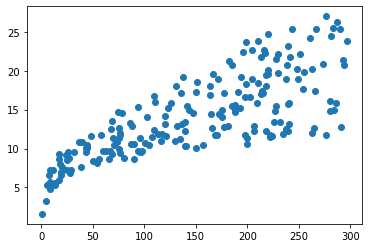

In [ ]:
### BEGIN SOLUTION

plt.scatter(X1,Y)
X1_N=(X1-np.mean(X1))/np.std(X1)
X1_X1_N=(X1_X1-np.mean(X1_X1))/np.std(X1_X1)
X2_N=(X2-np.mean(X2))/np.std(X2)
X2_X2_N=(X2_X2-np.mean(X2_X2))/np.std(X2_X2)
Y_N=(Y-np.mean(Y))/np.std(Y)


### END SOLUTION

## Step 4: Forming the iteration

As described in the problem statement, we would like to find a function such that: 

>$$Sales=\theta_0+\theta_1(TV Advertisement)+\theta_2(TV Advertisement)^2+\theta_3(Radio Advertisement)+\theta_4(Radio Advertisement)^2$$



1.   Initialize theta parameters: $$\theta_0,\theta_1,\theta_2,\theta_3,\theta_4$$Pick a number between 0 to 0.5 for all Thetas. You will have to change these values over and over till you get the result you want

2.   Initialize the learning rate eta $$\eta$$ as a value between 0 and 0.1. You will have to change the learning rate over and over till you get the result you want.

3.  Form the loss function (Mean squared error) as below:

>>$J= \frac{1}{Data Size}\sum_{Data} (\hat{y}-y)^2$

>>>$\hat{y}$ is the predicted value

>>>$y$ is the actual value

4.  Form the deravatives of Loss (J) with respect to Thetas:

>>$Jt0 = \frac{dJ}{d\theta_0}$<br>
>>$Jt1 = \frac{dJ}{d\theta_1}$<br>
>>$Jt2 = \frac{dJ}{d\theta_2}$<br>
>>$Jt3 = \frac{dJ}{d\theta_3}$<br>
>>$Jt4 = \frac{dJ}{d\theta_4}$

5.  Form the iterative procedure in which Theta values are updated based on the derivatives (Gradient Descent).

<font color='red'> Important notes:


*   It is important that you do not change the variable names in the code below
*   When your code finishes, you need to have the final Theta values in a list called Theta; the first elelement of the list should be theta0, the second item of the list should be theta1,...
*   You need to have a variable called J_All which records the J values as your iterative procedure runs (Append J value to the list in each iteration) so you can plot J_All in the next step.  
*   The iterative procedure goes through all data as many times as you want (Select a number larger than 100 and below 10000)
*   Dont forget to use the normalized features

In [ ]:
### BEGIN SOLUTION
theta=[0.5,0.5,0.5,0.5,0.5]
eta=0.1
m=len(X1)
J_All=[]
for iteration in range(100):
  J= 0
  Jt0=0
  Jt1=0
  Jt2=0
  Jt3=0
  Jt4=0
  for i in range(m):
    J=J+(1/m)*(theta[0]+theta[1]*X1_N[i]+theta[2]*X1_X1_N[i]+theta[3]*X2_N[i]+theta[4]*X2_X2_N[i]*X1_N[i]-Y_N[i])**2
    Jt0=Jt0+(1/m)*2*(theta[0]+theta[1]*X1_N[i]+theta[2]*X1_X1_N[i]+theta[3]*X2_N[i]+theta[4]*X2_X2_N[i]*X1_N[i]*X1_N[i]-Y_N[i])
    Jt1=Jt1+(1/m)*2*(theta[0]+theta[1]*X1_N[i]+theta[2]*X1_X1_N[i]+theta[3]*X2_N[i]+theta[4]*X2_X2_N[i]*X1_N[i]*X1_N[i]-Y_N[i])*X1_N[i]
    Jt2=Jt2+(1/m)*2*(theta[0]+theta[1]*X1_N[i]+theta[2]*X1_X1_N[i]+theta[3]*X2_N[i]+theta[4]*X2_X2_N[i]*X1_N[i]*X1_N[i]-Y_N[i])*X1_N[i]*X1_N[i] 
    Jt3=Jt3+(1/m)*2*(theta[0]+theta[1]*X1_N[i]+theta[2]*X1_X1_N[i]+theta[3]*X2_N[i]+theta[4]*X2_X2_N[i]*X1_N[i]*X1_N[i]-Y_N[i])*X1_N[i]*X1_N[i]*X1_N[i]
    Jt4=Jt4+(1/m)*2*(theta[0]+theta[1]*X1_N[i]+theta[2]*X1_X1_N[i]+theta[3]*X2_N[i]+theta[4]*X2_X2_N[i]*X1_N[i]*X1_N[i]-Y_N[i])*X1_N[i]*X1_N[i]*X1_N[i]*X1_N[i] 
J_All.append(J)
theta[0]-=eta*Jt0
theta[1]-=eta*Jt1
theta[2]-=eta*Jt2
theta[3]-=eta*Jt3
theta[4]-=eta*Jt4

  
### END SOLUTION

##Step 5: Verify the variables

Run the following code block and make sure:
*   The first line should print the eta value that you have selected
*   The second line should print True
*   The third line should print True

In [ ]:
print (eta)
print (len(theta)==5)
print (len(J_All)>100)

0.1
True
False


## Step 6: Create a loss plot

Run the following code and you should see the loss going down as the number of iteration increases

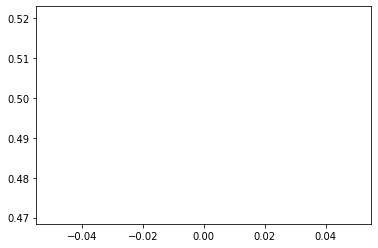

In [ ]:
plt.plot(J_All)

## Step 7: Form the predictions

Use the final Theta values and normalized features to form the prediction variable


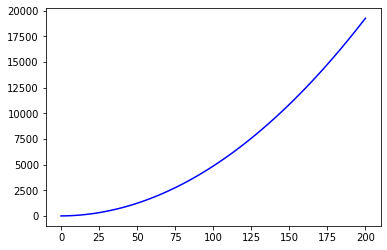

In [ ]:
### BEGIN SOLUTION
X1_N = np.linspace(0,200,100)
Predicted= theta[4]*(X1_N**2)+theta[3]*(X1_N)+theta[2]*(X1_N**2)+theta[1]*X1_N+theta[0]
plt.plot(X1_N,Predicted,color='blue')
### END SOLUTION

Step 8: Verify the predictions 

Run the following commands, you should be able to see the actual values in blue and predicted values in red.

ValueError: ignored

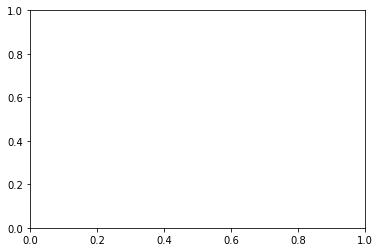

In [ ]:
plt.scatter(X1_N,Y_N)
plt.scatter(X1_N,Predicted,color='red')
plt.xlabel('TV Advertisement')
plt.ylabel('Sales')
plt.figure()
plt.scatter(X2_N,Y_N)
plt.scatter(X2_N,Predicted,color='red')
plt.xlabel('Radio Advertisement')
plt.ylabel('Sales')